In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import atus_analysis as at
import numpy as np
%matplotlib inline
np.set_printoptions(suppress=True)

In [2]:
activity = pd.read_csv('data/atusact_2014.dat')

In [3]:
respondent = pd.read_csv('data/atusresp_2014.dat')

In [4]:
roster = pd.read_csv('data/atusrost_2014.dat')

In [5]:
#who = pd.read_csv('data/atuswho_2014.dat')

In [6]:
#cps = pd.read_csv('data/atuscps_2014.dat')

In [7]:
#elder_care = pd.read_csv('data/atusrostec_2014.dat')

In [8]:
activity_sum = pd.read_csv('data/atussum_2014.dat')

In [9]:
child_care = activity[['TUCASEID', 'TUACTIVITY_N', 'TUACTDUR24']].copy()

In [10]:
respondent.head()

,TUCASEID,TULINENO,TUYEAR,TUMONTH,TEABSRSN,TEERN,TEERNH1O,TEERNH2,TEERNHRO,TEERNHRY,...,TXSPEMPNOT,TXSPUHRS,TXTCC,TXTCCTOT,TXTCOC,TXTHH,TXTNOHH,TXTO,TXTOHH,TXTONHH
0,20140101140007,1,2014,1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,-1,0,0,-1
1,20140101140011,1,2014,1,-1,-1,-1,500,-1,1,...,-1,-1,-1,0,0,-1,-1,-1,-1,-1
2,20140101140028,1,2014,1,-1,-1,-1,-1,-1,-1,...,-1,-1,0,0,0,0,0,-1,-1,-1
3,20140101140063,1,2014,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,0,0,-1,-1,-1,-1,-1
4,20140101140168,1,2014,1,-1,-1,-1,-1,-1,-1,...,-1,-1,0,0,0,0,-1,0,0,-1


In [11]:
# for ID, household in child_care_by_ID:
#     print(ID)
#     print(household)
#child_care['codes'] = at.get_six_digit_codes(child_care)
child_care['codes'] = [str(row.TUTIER1CODE) + str(row.TUTIER2CODE) + str(row.TUTIER3CODE) for row in activity.itertuples()] 

In [12]:
child_care

,TUCASEID,TUACTIVITY_N,TUACTDUR24,codes
0,20140101140007,1,540,111
1,20140101140007,2,30,311
2,20140101140007,3,60,121
3,20140101140007,4,10,18111
4,20140101140007,5,30,1111
5,20140101140007,6,20,18131
6,20140101140007,7,90,13116
7,20140101140007,8,25,18131
8,20140101140007,9,30,1233
9,20140101140007,10,605,111


In [13]:
child_care_by_ID = child_care.groupby(['TUCASEID'])

In [14]:
child_care_by_ID.get_group(20140101140007)

,TUCASEID,TUACTIVITY_N,TUACTDUR24,codes
0,20140101140007,1,540,111
1,20140101140007,2,30,311
2,20140101140007,3,60,121
3,20140101140007,4,10,18111
4,20140101140007,5,30,1111
5,20140101140007,6,20,18131
6,20140101140007,7,90,13116
7,20140101140007,8,25,18131
8,20140101140007,9,30,1233
9,20140101140007,10,605,111


In [15]:
minutes_caring = {}
for name, group in child_care_by_ID:
    for row in group.itertuples():
        if row.codes[:2] in ['31', '32', '33']:
            if name in minutes_caring:
                minutes_caring[name] = minutes_caring[name] + row.TUACTDUR24
            else:
                minutes_caring[name] = row.TUACTDUR24
child_care_time = pd.Series(minutes_caring, name='Child Care Time')

In [16]:
child_care_time = pd.DataFrame(child_care_time)

In [17]:
#child_care_time = child_care_time.rename(columns={'0': 'Child Care Time'})

In [18]:
weight = respondent[['TUCASEID', 'TUFINLWGT', 'TRCHILDNUM', 'TRERNWA']].copy()

In [19]:
weight.set_index(weight.pop('TUCASEID'), inplace=True)

In [20]:
#child_care_time['TUCASEID'] = child_care_time.index.to_series()

In [21]:
weighted_child_care = weight.join(child_care_time)

In [22]:
activity_sum.head()

,tucaseid,TUFINLWGT,TRYHHCHILD,TEAGE,TESEX,PEEDUCA,PTDTRACE,PEHSPNON,GTMETSTA,TELFS,...,t181601,t181699,t181801,t181899,t189999,t500101,t500103,t500105,t500106,t500107
0,20140101140007,4.891316e+06,0,20,2,39,1,1,1,4,...,0,0,0,0,0,0,0,0,0,0
1,20140101140011,2.314737e+07,16,16,2,37,2,2,1,1,...,0,0,0,0,0,0,0,0,0,0
2,20140101140028,2.094182e+07,2,65,2,38,1,1,1,5,...,0,0,0,0,0,0,0,0,0,0
3,20140101140063,2.505899e+06,-1,50,2,39,2,2,2,5,...,0,0,0,0,0,0,0,0,0,0
4,20140101140168,1.592823e+07,8,23,2,39,2,2,2,4,...,0,0,0,0,0,0,0,0,0,0


In [23]:
weight.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11592 entries, 20140101140007 to 20141212142500
Data columns (total 3 columns):
TUFINLWGT     11592 non-null float64
TRCHILDNUM    11592 non-null int64
TRERNWA       11592 non-null int64
dtypes: float64(1), int64(2)
memory usage: 362.2 KB


In [24]:
weighted_child_care['TRERNWA'] = weighted_child_care['TRERNWA'].replace(-1, 0)
weighted_child_care['TRERNWA'] = weighted_child_care['TRERNWA'] / 100

In [25]:
weighted_child_care.head()

,TUFINLWGT,TRCHILDNUM,TRERNWA,Child Care Time
TUCASEID,,,,
20140101140007,4.891316e+06,1,0.00,30.0
20140101140011,2.314737e+07,1,1846.15,NaN
20140101140028,2.094182e+07,3,0.00,180.0
20140101140063,2.505899e+06,0,0.00,NaN
20140101140168,1.592823e+07,1,0.00,175.0


In [26]:
weighted_child_care['weighted_care_time'] = weighted_child_care['TUFINLWGT'] * weighted_child_care['Child Care Time']

In [27]:
weighted_child_care.head()

,TUFINLWGT,TRCHILDNUM,TRERNWA,Child Care Time,weighted_care_time
TUCASEID,,,,,
20140101140007,4.891316e+06,1,0.00,30.0,1.467395e+08
20140101140011,2.314737e+07,1,1846.15,NaN,NaN
20140101140028,2.094182e+07,3,0.00,180.0,3.769528e+09
20140101140063,2.505899e+06,0,0.00,NaN,NaN
20140101140168,1.592823e+07,1,0.00,175.0,2.787441e+09


In [28]:
summed_child_care = weighted_child_care.sum()

In [29]:
summed_child_care

TUFINLWGT             9.201173e+10
TRCHILDNUM            9.154000e+03
TRERNWA               5.884625e+06
Child Care Time       3.504950e+05
weighted_care_time    2.267731e+12
dtype: float64

In [30]:
child_care_avg_daily_minutes = summed_child_care['weighted_care_time'] / summed_child_care['TUFINLWGT']

In [31]:
child_care_avg_daily_minutes

24.646112399316848

In hours:

In [32]:
child_care_hourly = child_care_avg_daily_minutes / 60

In [33]:
child_care_hourly

0.41076853998861412

0.41 corresponds to the figure reported by the BLS in their table 1 from their [press release](http://www.bls.gov/news.release/archives/atus_06242015.htm) of the 2014 Survey.
![Hourly Child Care in the US](ATUS-Survery-hourly-childcare.png)

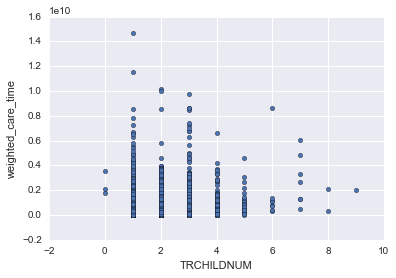

In [34]:
weighted_child_care.plot(kind='scatter', x='TRCHILDNUM', y='weighted_care_time')

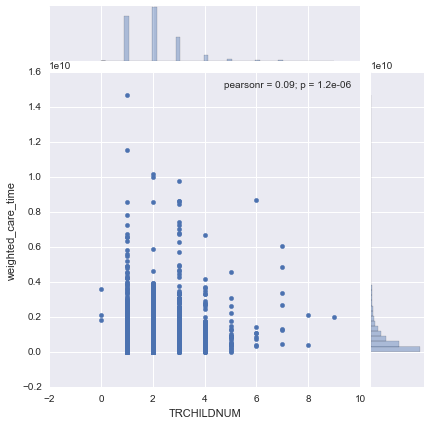

In [35]:
sns.jointplot(x="TRCHILDNUM", y='weighted_care_time', data=weighted_child_care)

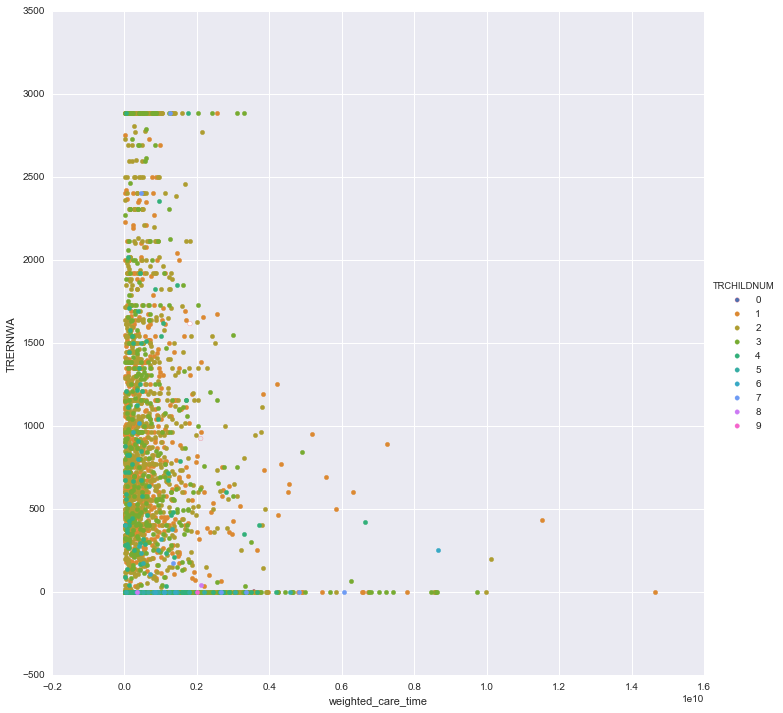

In [39]:
sns.FacetGrid(weighted_child_care, hue="TRCHILDNUM", size=10) \
   .map(plt.scatter, "weighted_care_time", "TRERNWA") \
   .add_legend()

In [40]:
weighted_child_care.corr()

,TUFINLWGT,TRCHILDNUM,TRERNWA,Child Care Time,weighted_care_time
TUFINLWGT,1.000000,-0.039614,-0.038998,-0.050574,0.466304
TRCHILDNUM,-0.039614,1.000000,0.111805,0.069178,0.090066
TRERNWA,-0.038998,0.111805,1.000000,-0.099774,-0.162361
Child Care Time,-0.050574,0.069178,-0.099774,1.000000,0.686949
weighted_care_time,0.466304,0.090066,-0.162361,0.686949,1.000000


In [ ]:
sleep = activity[['TUCASEID', 'TUACTIVITY_N', 'TUACTDUR24']].copy()
sleep['codes'] = [str(row.TUTIER1CODE) + str(row.TUTIER2CODE) + str(row.TUTIER3CODE) for row in activity.itertuples()]